## Описание проекта

Необходимо проанализировать данные интернет-магазина на основе подготовленного списка гипотез для увеличения выручки.


**Цель** - приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

### Описание данных

*Файл /datasets/hypothesis.csv.*
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.


*Файл /datasets/orders.csv.*
- **transactionId** — идентификатор заказа;
- **visitorId** — идентификатор пользователя, совершившего заказ;
- **date** — дата, когда был совершён заказ;
- **revenue** — выручка заказа;
- **group** — группа A/B-теста, в которую попал заказ.

*Файл /datasets/visitors.csv.*
- **date** — дата;
- **group** — группа A/B-теста;
- **visitors** — количество пользователей в указанную дату в указанной группе A/B-теста

### План
1. [Выбор приоритетных гипотез методом ICE и его подметодом RICE](#start)
2. [Анализ результатов A/B теста:](#AB-test)
    - Анализ куммулятивных метрик (выручка, средний чек и конверсия)
    - Анализ выбросов и всплесков
3. [Вывод](#conclusion)

## Приоритизация гипотез <a id='start'></a>

In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('/datasets/hypothesis.csv')
pd.options.display.max_colwidth = 110
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Приведем названия столбцов к нижнему регистру, чтобы было более удобно работать с таблицей

In [3]:
data.columns = data.columns.str.lower()

Применим метод ICE и его модификацию RICE для приоритизации.

<br>

$$ICE = \frac{Impact * Confidence}{Efforts}$$

$$RICE = \frac{Rearch * Impact * Confidence}{Efforts}$$
</div>

---

In [4]:
data['ICE'] = data['impact']*data['confidence']/data['efforts']
data[['hypothesis', 'ICE']].sort_values(by = 'ICE', ascending = False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Самыми приоритетными оказались гипотезы:
- Запустить акцию, дающую скидку на товар в день рождения
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


Теперь применим метод **RICE**

In [5]:
data['RICE'] = data['reach']*data['impact']*data['confidence']/data['efforts']
data[['hypothesis', 'RICE']].sort_values(by = 'RICE', ascending = False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


В методе RICE поменялся приоритет гипотез. Первые четыре места заняли:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей	
- Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию


При этом в методе ICE вторая перечисленных гипотеза занимала пятое место.

Различия обусловлены добавлением в расчет одного параметра - reach (охват пользователей). 
Гипотеза "Запустить акцию, дающую скидку на товар в день рождения" затронет меньшее количество пользователей, чем гипотеза о добавлении блоков рекомендация на товар или о добавлении двух новых каналов привлечения трафика.

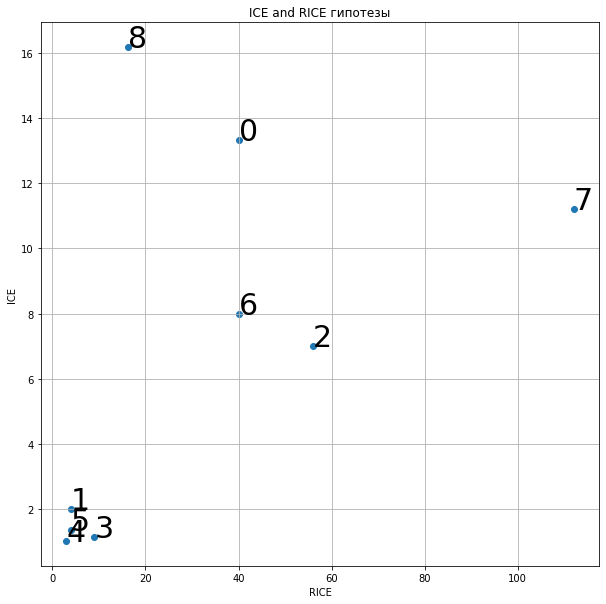

In [6]:
y = data['ICE'] 
z = data['RICE'] 
n = data.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]), size=30)

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")
plt.grid()    

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()

Таким образом, по результатам двех текстов, можно сказать, что **наиболее приоритетными являются гипотезы**:
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
- Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа	
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей

## Анализ A/B-теста <a id='AB-test'></a>

In [7]:
orders = pd.read_csv('/datasets/orders.csv')
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Типы данных верны, пропусков не обнаружено

In [8]:
visitors = pd.read_csv('/datasets/visitors.csv', parse_dates = ['date'])
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Типы данных также верны, пропусков нет

Теперь необходимо **проверить** данные **на наличие дубликатов**

In [9]:
visitors.duplicated().sum(), orders.duplicated().sum()

(0, 0)

Дкбликаты не обнаружены

In [10]:
orders['group'].unique()

array(['B', 'A'], dtype=object)

Всего две группы A/B теста 

Выясним даты проведения теста, а также убедимся, что они совпадают в обоих датасетах

In [11]:
orders['date'].min(), orders['date'].max()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

In [12]:
visitors['date'].min(), visitors['date'].min()

(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-01 00:00:00'))

Тест проводился с 01-08-2019 по 31-08-2019, то есть весь август 2019 года

Рассчитаем **количество уникальных пользователей** для каждой группы

In [13]:
grouped_orders = orders.groupby(by='group', as_index = False).agg({'visitorId':'nunique'})
display(grouped_orders)
f'Доля уникальных клиентов группы A составляет {grouped_orders["visitorId"][0]/grouped_orders["visitorId"].sum() * 100:.1f} процентов от общего количества'

,group,visitorId
0,A,503
1,B,586


'Доля уникальных клиентов группы A составляет 46.2 процентов от общего количества'

Таким образом, разлисия составляют 3.8%, что является допустимым уровнем, не обязтельно удалять данне

При этом, количество посещений для каждой группы:

In [14]:
grouped_visits = visitors.groupby(by='group').agg({'visitors':'sum'})
grouped_visits

,visitors
group,
A,18736
B,18916


Теперь посмотрим, есть ли те, кто попал одновременно в две группы. Если есть, таких пользователей следует удалить.

In [15]:
amount_of_group = orders.groupby(by = 'visitorId', as_index = False).agg({'group':'nunique'}).sort_values(by ='group', ascending = False)
len(amount_of_group[amount_of_group['group'] == 2])

58

Одновременно в две группы попали 58 пользователей. Оставим их в данных

Таким образом, обобщим:
- Всего две тестируемые группы
- В группе А - 503 уникальных пользователя(46,2% от общего количества), в группе B - 586 (53,8% от общего количества)
- 58 польззрвателей попали одновременно в две группы


***Сроки проведения теста***: с 01-08-2019 по 31-08-2019

### Анализ куммулятивных метрик (выручка, средний чек и конверсия)

#### Анализ куммулятиной выруки

In [16]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups = orders[['date','group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах 
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

display(cumulativeData.head(5))
datesGroups['date'].min(), datesGroups['date'].max()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


(Timestamp('2019-08-01 00:00:00'), Timestamp('2019-08-31 00:00:00'))

Даты совпадают с датами проведения теста, рассчитываемыми ранее

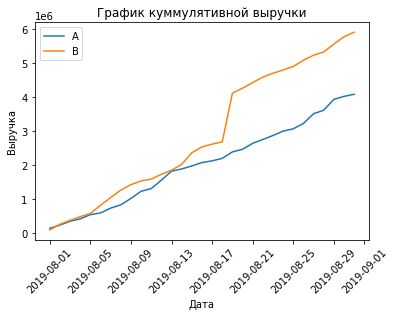

In [17]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График куммулятивной выручки')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.xticks(rotation=45)  
plt.legend();

Выручка группы А увеличивается более равномерно, чем выручка группы. Во второй произошел сильный скачок примерно 18 августа.
Это может быть показателем резкого учеличения числа заказов в этот день, либо появления дорогих заказов.

#### Рассчет среднего чека

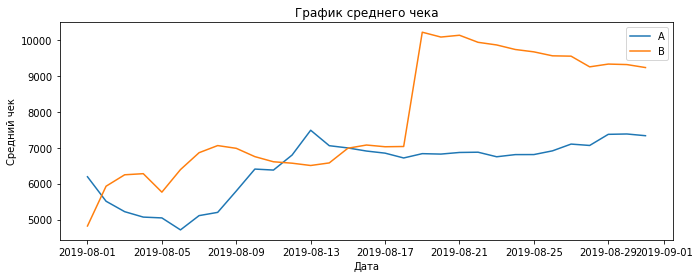

In [18]:
fig = plt.figure()
    
fig.set_figwidth(11)

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График среднего чека')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend();

Средний чек тоже становится равномерным ближе к концу теста: установился для группы A и продолжает падать для группы B. Возможно, в группу B в первой половине теста попали крупные заказы (резкий всплеск на графике). То есть требуется больше данных, чтобы прийти к реальному среднему чеку и установиться на его уровне.

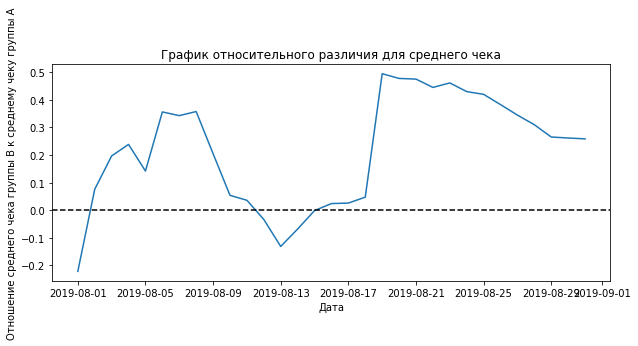

In [19]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
fig = plt.figure()
    
fig.set_figwidth(10)
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

plt.title('График относительного различия для среднего чека')
plt.xlabel('Дата')
plt.ylabel('Отношение среднего чека группы B к среднему чеку группы А')
# добавляем ось 
plt.axhline(y=0, color='black', linestyle='--');

Мы видим резкие спады и подъёмы, что свидетельствует о выбросах.

#### Куммулятивная конверсия

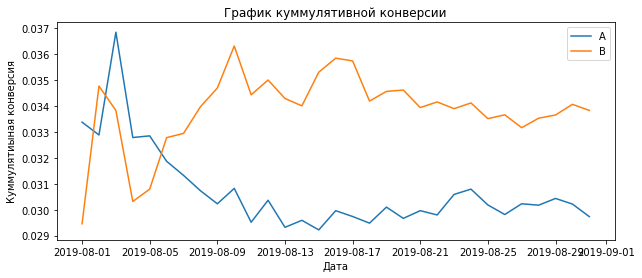

In [20]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
fig = plt.figure()
    
fig.set_figwidth(10)
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('График куммулятивной конверсии')
plt.xlabel('Дата')
plt.ylabel('Куммулятиыная конверсия')

plt.legend();

Конверсия группы B превосходит конверсию группы А, они выглядят уже зафиксированными

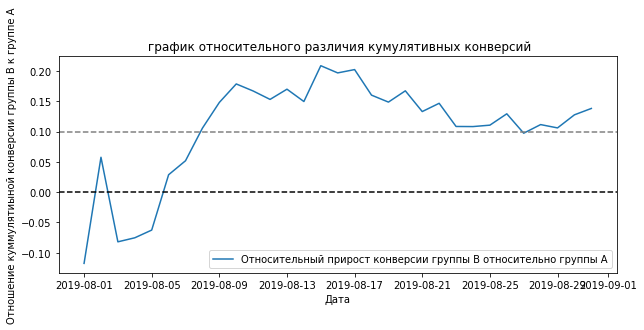

In [21]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

fig = plt.figure()
    
fig.set_figwidth(10)
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title(' график относительного различия кумулятивных конверсий')
plt.xlabel('Дата')
plt.ylabel('Отношение куммулятиыной конверсии группы B к группе A')

plt.legend()


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--');

Сначала группа B сильно проигрывала группе A. Затем позиции поменялись и относительный прирост конверсии стал выше в группе B, но пока что отношение конверсий ещё не установились.

### Анализ выбросов и всплесков

Сперва посчитаем количество заказов для каждого пользователя

In [22]:
data = orders.groupby(by = 'visitorId', as_index = False).agg({'transactionId':'nunique'})
data.columns = ['visitorId', 'count']

data.sort_values(by='count',ascending = False).head(10)

,visitorId,count
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


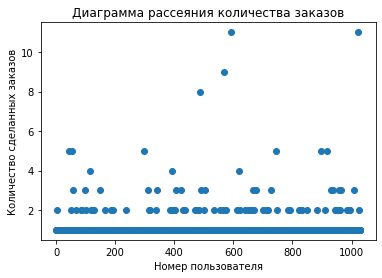

In [23]:
x_values = pd.Series(range(0,len(data['count'])))
plt.title('Диаграмма рассеяния количества заказов')
plt.xlabel('Номер пользователя')
plt.ylabel('Количество сделанных заказов')
plt.scatter(x_values, data['count']);

Из графика видно, что в основном люди делали менее четырех заказов. В основном два или один. Для полной достоверности посчитаем прецентили.

In [24]:
np.percentile(data['count'], [95,97.5,99])

array([2., 3., 4.])

Таким образом, не более 5% пользователей совершили более двух покупок, и не более 1% - четыре покупки. (не более 2.5% - 3 покупки). Обозначим нашу границу для аномальных значений по количеству заказов на уровне 97.5 перцентиля

In [25]:
order_limit = int(np.percentile(data['count'], [97.5])[0])

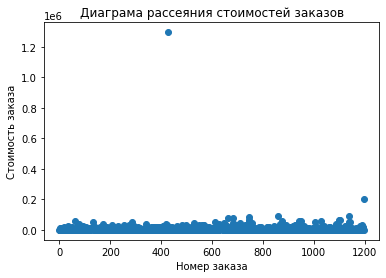

In [26]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.title('Диаграма рассеяния стоимостей заказов')
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue']);

In [27]:
np.percentile(orders['revenue'], [95, 97.5, 99])

array([28000. , 39530. , 58233.2])

Не более пяти процентов от всех заказов стоят больше 28000 и не более одного процента - 58233,2.

Обозначим границу аномальных значений на уровне 95 перцентиля

In [28]:
revenue_limit = int(np.percentile(orders['revenue'], [95])[0])

(0.0, 58234.0)

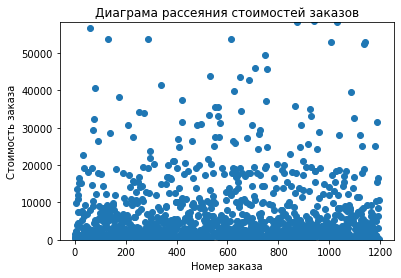

In [29]:
plt.title('Диаграма рассеяния стоимостей заказов')
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость заказа')
plt.scatter(x_values, orders['revenue'])
plt.ylim(0, 58234)

**Обобщим**: 95-й и 99-й перцентили средних чеков равны 28 000 рублям и 58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя


Посчитаем статистическую значимость различий в среднем количестве заказов и статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем гипотезы. Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [30]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

visitorsA = visitors[visitors['group'] == 'A']['visitors'].sum()
visitorsB = visitors[visitors['group'] == 'B']['visitors'].sum()

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsB - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('P-value: '+ "{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print('Различия в среднем количестве заказов: ' + "{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

P-value: 0.01679
Различия в среднем количестве заказов: 0.138


Вывод: По «сырым» данным есть различия в среднем числе заказов групп A и B.
Первое число — p-value = 0.017 меньше 0.05. Значит, нулевую гипотезу о том, что статистически значимых различий в среднем числе заказов между группами нет, отвергаем.
Относительный выигрыш группы B равен 13.8% (второе число в выводе)

Теперь проверим статистическую значимость различий в среднем чеке между сегментами. Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [31]:
print('P-value: '+'{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Различие в среднем чеке: ' +'{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

P-value: 0.72929
Различие в среднем чеке: 0.259


P-value значительно больше 0.05, то есть причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Средний чек группы B значительно (на 26%) выше среднего чека группы A.

Незначимость такого различия можно объяснить наличием "всплеска" - аномальных значений в данных среднего чека

(*95-й и 99-й перцентили средних чеков равны 28 000 рублям и 58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.*)

Посмотрим, сколько всего аномальных пользователей. Будем считать, что это пользователи, совершившие более трех заказов и заказы, стоимость которых выше 28 000 рублей 

In [32]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > order_limit]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > order_limit]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_limit]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
63


Всего 63 аномальных пользователя. Избавимся от них

In [33]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsA - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsB - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Обозначим ещё раз нулевую и альтернативную гипотезы

*Нулевая*: различий в среднем количестве заказов между группами нет.

*Альтернативная*: различия в среднем между группами есть.

In [34]:
print('P-value: '+'{0:5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Различие в среднем количестве заказов ' +'{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.017943
Различие в среднем количестве заказов 0.148


Результаты по среднему количеству заказов не изменились, p-value также ниже 0.05, то есть отвергается нулявая гипотеза об отсутствии статистически значимых различий в среднем числе заказов. При этом относительный выигрыш группы B увеличился до 14,8%

И следующие две гипотезы

*Нулевая гипотеза*: различий в среднем чеке между группами нет.

*Альтернативная гипотеза*: различия в среднем чеке между группами есть.

In [35]:
print('P-value: '+
    '{0:.5f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Различия в среднем чеке ' +
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

P-value: 0.97653
Различия в среднем чеке -0.017


P-value также значительно больше 0.05, то есть причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. 

Однако теперь средний чек группы B приблизился к среднему чеку группы A, даже оказался на 2% ниже

### Выводы<a id='conclusion'></a>

Наиболее приоритетные гипотезы исходя из результатов обоих методов - седьмая, нулевая и шестая

В анализе результатов A/B теста выявлено:
- Есть статистически значимые различия по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- График различия конверсии между группами сообщает, что результаты группы B значительно лучшее группы A
- График различия среднего чека говорит о том, что результаты группы B ухудшаются день ото дня, но сейчас находятся примерно на уровне 30%:


Таким образом, надо остановить тест, признать его успешным и перейти к проверке следующей гипотезы.